<h1>AIML CA1</h1>

In [1]:
import pandas as pd

df = pd.read_csv('CA1-Classification-Dataset.csv')
df.head()
#df.sample(5) #Randomly selected 5 rows from the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<h3>Seeing the missing values in the dataset</h3>

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

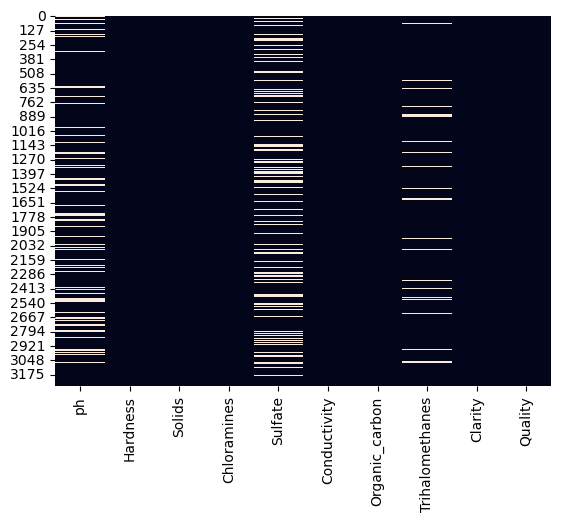

In [2]:
#From this we can see that the 3 columns with alot of missing data are sulfate, ph and trihalomethanes
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

#from this we can see the total number of missing data
pd.isnull(df).sum()

In [3]:
#View the size of the dataset and the columns.
print(df.shape)
df.columns


(3276, 10)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality'],
      dtype='object')

<h3>Since the dataset has many missing values dropping NA columns is not a good decesion thus i have used KNN to take the values of nearby values which will allow the dataset to retain its data size.</h3>

In [4]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the dataset
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,7.156857,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.05786,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.54173,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0.0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0.0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0.0
8,7.592418,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0.0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0.0


In [5]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn import datasets 

from sklearn.metrics import r2_score
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,7.156857,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.05786,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.54173,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


<h1>Splitting Dataset into Test and Train</h1>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']], df['Quality'], test_size=0.3, random_state=42)

In [7]:
# Support Vector Machine (Support Vector Classifier)
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# fit a SVC model to the data
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
svc_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

SVC(kernel='linear')
              precision    recall  f1-score   support

         0.0       0.63      0.97      0.76       617
         1.0       0.31      0.02      0.04       366

    accuracy                           0.62       983
   macro avg       0.47      0.50      0.40       983
weighted avg       0.51      0.62      0.49       983



In [8]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# fit a Decision Tree model to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
ct_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       617
         1.0       0.44      0.49      0.46       366

    accuracy                           0.58       983
   macro avg       0.56      0.56      0.56       983
weighted avg       0.59      0.58      0.58       983



In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a Logistic Regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
lr_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       617
         1.0       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
nb_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

GaussianNB()
              precision    recall  f1-score   support

         0.0       0.65      0.89      0.75       617
         1.0       0.52      0.20      0.29       366

    accuracy                           0.63       983
   macro avg       0.59      0.55      0.52       983
weighted avg       0.61      0.63      0.58       983



In [11]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
knn_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65       617
         1.0       0.37      0.31      0.34       366

    accuracy                           0.54       983
   macro avg       0.49      0.50      0.49       983
weighted avg       0.53      0.54      0.53       983



In [12]:
print(f'KNN Model accuracy: {round(knn_accuracy,2)}')
print(f'Naive Bayes Model accuracy: {round(nb_accuracy,2)}')
print(f'Logistic Regression Model accuracy: {round(lr_accuracy,2)}')
print(f'Classification Tree Model accuracy: {round(ct_accuracy,2)}')
print(f'Support Vector Classifier Model accuracy: {round(svc_accuracy,2)}')

KNN Model accuracy: 0.54
Naive Bayes Model accuracy: 0.63
Logistic Regression Model accuracy: 0.63
Classification Tree Model accuracy: 0.58
Support Vector Classifier Model accuracy: 0.62
